## Summary
An 'Airlines' analysis is performed to compare the rating and popularity of the different airlines included in this dataset. 

Descriptive statistics and a dual axis combined bar chart show that Asian airlines are clearly the best performing in term of average 'Overall Rating' and 'Recommended' percentages, only with 'Qatar Airways' being able to get on their way with a third position. However, these Asian airlines are also the least popular ones, or at least the ones with the least number of reviews. 

While these results, supported with a scatter plot, can suggest a negative correlation between rating and number of reviews, Qatar Airways is the clear example of how this is not necesarilly true. A more plausible explanation resides in a cultural behaviour. Since the best and least times rated airlines reside in a very specific part of the world, it could be assumed that customers from those areas mostly tend to leave reviews after positive experiences.

Besides the previous theory, there is one factor that objectively contributes to the low rates of the worst performing airlines. The percentages of reviews left for each class, type of traveller and tier of frequent reviewer are displayed for each airline. It can clearly be observed how the three worst rated airlines have the highest percentages of 'Economy Class' and 'Blue Tier reviewers', and the lowest percentages of 'Solo Leisure' reviewers. These resuls go in accordance with those obtained in the previous analysis (https://github.com/DandeLC/Airline-Reviews-Sentiment-Analysis/blob/main/notebooks/2.2.%20Type%20of%20Customer%20EDA.ipynb). While the differences in percentages are not big enough to solely justify the differences in ratings, this is clearly a factor to be considered when comparing the performance.

## Libraries

In [3]:
import pandas as pd # Data manipulation
import numpy as np # Data manipulation
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
sns.set() # Setting default Seaborn style for visualizations
# import statsmodels.api as sm
import scipy.stats as stats # Statistical tests
import scikit_posthocs as sp # Post-hoc analysis for non-parametric tests

## Functions
Some tasks are performed repeatedly throughout the analysis. Reusable functions have been created to avoid code repetition and allow the notebook to focus on analysis. These functions are defined and explained in detail in the 'eda_utils.py' script contained in the 'src/functions' directory within this repository (https://github.com/DandeLC/Airline-Reviews-Sentiment-Analysis/blob/main/src/functions/eda_utils.py). The following code allows to import them from the script.

In [6]:
import sys
import os

# Add the path to the src directory
sys.path.append(os.path.abspath(os.path.join('..', 'src', 'functions')))

# Importing the functions from the script
from eda_utils import normality_check, kruskal, plot_percentage

## Data
The cleaned dataset with engineered features containing only verified reviews is stored in the 'data/interim' directory within this repository. The path has been included to run the code without further modifications.

In [9]:
df= pd.read_csv('../data/interim/airlines_verified.csv', index_col = 0)

In [11]:
df.head(3)

,Title,Reviews,Frequent Reviewer,Verified,Airline,Class,Type of Traveller,Route,Review Date,Flight Year,Flight Month,Quick Review,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Flight was amazing. The crew onboard this fl...,0,1,Singapore Airlines,Business Class,Solo Leisure,Jakarta to Singapore,2024-03-01,2023,12,0,4,4,4,4,4,9,1
1,seats on this aircraft are dreadful,Booking an emergency exit seat still meant h...,1,1,Singapore Airlines,Economy Class,Solo Leisure,Phuket to Singapore,2024-02-21,2024,2,1,5,3,4,4,1,3,0
2,Food was plentiful and tasty,Excellent performance on all fronts. I would...,2,1,Singapore Airlines,Economy Class,Family Leisure,Siem Reap to Singapore,2024-02-20,2024,2,1,1,5,2,1,5,10,1


## Airlines Comparison

### 'Overall Rating' and Number of Reviews
Descriptive statistics are calculated for 'Overall Rating' across Airlines. Additionally, a combined bar chart displays the average 'Overall Rating' and number of reviews per Airline, sorting them out by descending overall rate. This allows for an initial assessment on airlines performance and popularity.

In terms of 'Overall Rating', Asian airlines clearly outperform the rest, with all six of them standing in the top seven best rated airlines. European airlines fall to the third last and last positions of the ranking, and Middle Eastern airlines, Qatar and Emirates, are third from the top and second from the bottom respectively.

When it comes to number of reviews, the situation is very different. In this case, the six Asian airlines fall within the last seven positions, while the Middle Eastern airlines plus Turkish Airlines occupy the podium of this ranking. 

                         count      mean       std  min  25%  50%   75%   max
Airline                                                                      
Air France               614.0  4.664495  3.539773  1.0  1.0  3.0   8.0  10.0
All Nippon Airways       200.0  7.850000  2.761454  1.0  7.0  9.0  10.0  10.0
Cathay Pacific Airways   565.0  6.099115  3.243775  1.0  3.0  7.0   9.0  10.0
EVA Air                  214.0  7.224299  3.020457  1.0  5.0  8.0  10.0  10.0
Emirates                 998.0  4.518036  3.287186  1.0  1.0  4.0   8.0  10.0
Japan Airlines           163.0  6.858896  3.202771  1.0  4.0  8.0  10.0  10.0
Korean Air               132.0  6.136364  3.312647  1.0  3.0  7.0   9.0  10.0
Qatar Airways           1311.0  7.072464  3.171692  1.0  5.0  8.0  10.0  10.0
Singapore Airlines       751.0  6.549933  3.276966  1.0  4.0  8.0   9.0  10.0
Turkish Airlines        1269.0  3.620961  3.240210  1.0  1.0  2.0   7.0  10.0


<Figure size 1200x600 with 0 Axes>

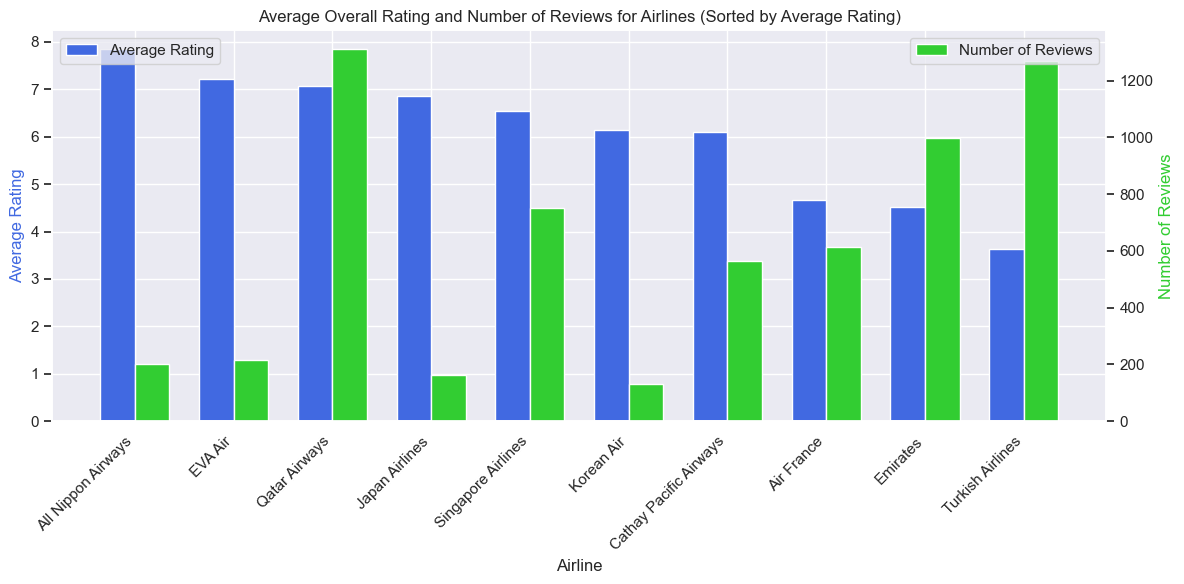

In [15]:
# Summary statistics for 'Overall Rating' by 'Airline'
summary_stats = df.groupby('Airline')['Overall Rating'].describe()
print(summary_stats)

# Calculate the average rating and number of reviews per airline
airline_stats = df.groupby('Airline')['Overall Rating'].agg(['mean', 'count'])
airline_avg_rating = airline_stats['mean']
review_counts = airline_stats['count']

# Sorting the airlines by average rating
sorted_indices = airline_avg_rating.sort_values(ascending=False).index
airline_avg_rating_sorted = airline_avg_rating[sorted_indices]
review_counts_sorted = review_counts[sorted_indices]

# Plotting the unstacked bar plot with sorted airlines
plt.figure(figsize=(12, 6))
ind = np.arange(len(airline_avg_rating_sorted))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting average ratings with a blue color scheme
ax1.bar(ind, airline_avg_rating_sorted, width, color='royalblue', label='Average Rating')

# Creating a second y-axis to plot review counts with a green color scheme
ax2 = ax1.twinx()
ax2.bar(ind + width, review_counts_sorted, width, color='limegreen', label='Number of Reviews')

ax1.set_xlabel('Airline')
ax1.set_ylabel('Average Rating', color='royalblue')
ax2.set_ylabel('Number of Reviews', color='limegreen')
ax1.set_title('Average Overall Rating and Number of Reviews for Airlines (Sorted by Average Rating)')
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(airline_avg_rating_sorted.index, rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Correlation between number of reviews and average overall rating
Given the results obtained from observing the average ‘Overall Rating’ and number of reviews of each airline, a scatter plot is displayed, and the Pearson’s correlation coefficient is calculated. The scatter plot suggests a negative correlation between this features, which is supported by the -0.54 Pearson’s correlation coefficient, but the p-value of 0.105 indicates that this correlation is not statistically significant. Qatar Airways can clearly be considered as an outlier, with the highest number of reviews but still the third best rated airline. Excluding this airline shows a much stronger negative correlation, with a coefficient of -0.836 and a p-value of 0.005, suggesting that this time, the correlation is statistically significant. 

One possible explanation is that airlines with more reviews, presumably more popular, are potentially exposed to more criticism. However, the outlier indicates that this cannot be the (only) reason. A more plausible explanation resides in cultural reasons. The top rated and least reviewed airlines correspond to a very specific geographic location (Japan, Taiwan, Korea). The smaller number of reviews could suggest that most of the customers come from those specific regions, and the average ratings could indicate that these specific customers tend to mostly leave only positive reviews. The rest of the airlines are famous for connecting flights from all over the world, hence the reviews are left by customers with bigger cultural differences. If instead of excluding Qatar as the outlier, the niche Asian airlines are excluded, the correlation disappears.  

#### Correlation with all airlines

In [19]:
# Defining a color map for the Airlines
airline_color_map = {
    'Emirates': 'red',
    'Qatar Airways': 'purple',
    'All Nippon Airways':'black',
    'EVA Air' :'green',
    'Japan Airlines':'darkred',
    'Singapore Airlines':'orange',
    'Cathay Pacific Airways':'lightgreen',
    'Air France':'blue',
    'Turkish Airlines':'indianred',
    'Korean Air':'skyblue'
}

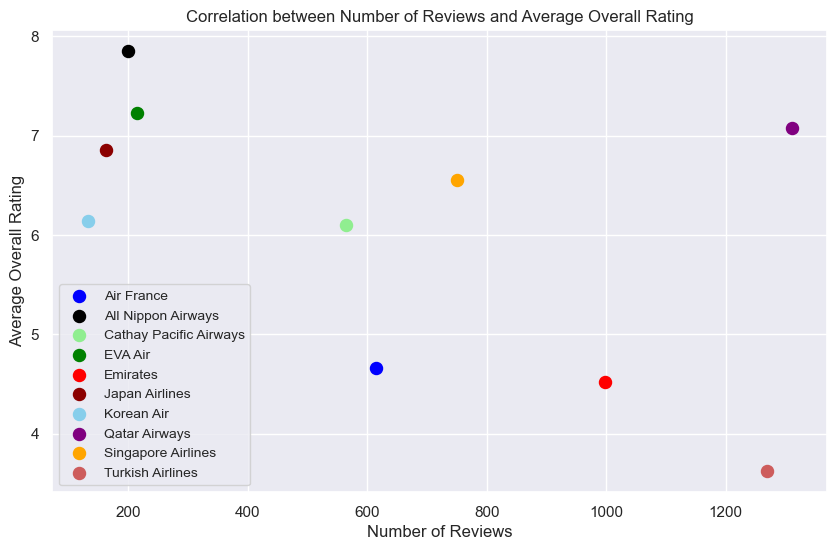

Pearson correlation coefficient: -0.5430842051239574
P-value: 0.10473969765531801


In [21]:
# Scatter plot of number of reviews and average 'Overall Rating'
plt.figure(figsize=(10,6))

for airline in airline_stats.index:
    plt.scatter(review_counts.loc[airline], airline_avg_rating.loc[airline], color=airline_color_map.get(airline), label=airline, s=75)

plt.xlabel('Number of Reviews')
plt.ylabel('Average Overall Rating')
plt.title('Correlation between Number of Reviews and Average Overall Rating')
plt.legend(loc='lower left',fontsize=10)
plt.show()

# Pearson's correlation
correlation, p_value = stats.pearsonr(review_counts, airline_avg_rating)

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

#### Excluding Qatar Airways as an outlier

In [24]:
# Exclude Qatar Airways from the Series
filtered_review_counts = review_counts.drop('Qatar Airways')
filtered_airline_avg_rating = airline_avg_rating.drop('Qatar Airways')

In [26]:
correlation, p_value = stats.pearsonr(filtered_review_counts, filtered_airline_avg_rating)

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.83630503409918
P-value: 0.004959541970868716


### Recommendations
Below are displayed the percentage of recommended reviews by 'Airline', sorted in descending order. As expected, the percentages go in accordance with the average 'Overall Rating'.

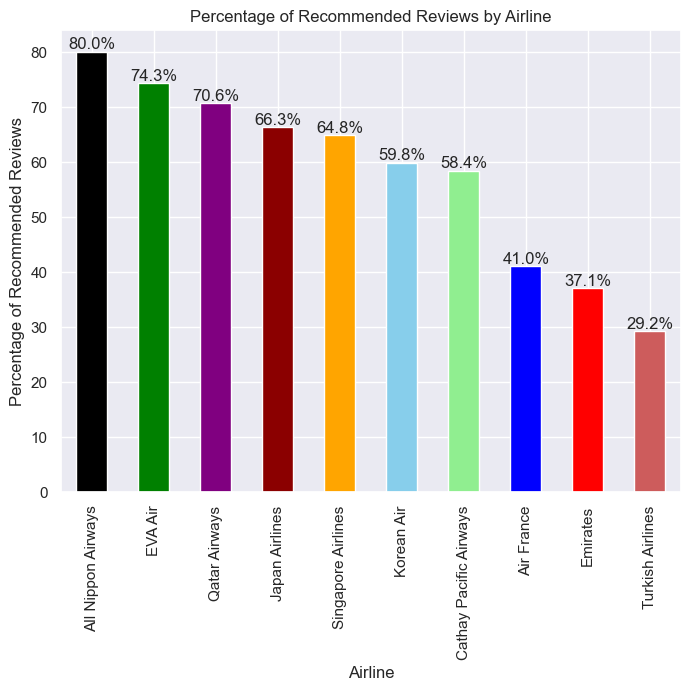

In [29]:
# Airlines for percentage bar chart
airline_percent = (df.groupby('Airline')['Recommended'].mean() * 100).sort_values(ascending=False)
# Generate the color list for the bar chart
colors = [airline_color_map.get(airline) for airline in airline_percent.index]

plot_percentage('Airline','Recommended',df,colors)

## Types of customers per Airline
In previous analysis it was found that the class, type of traveller and frequency of reviewing significantly influence the rating of the reviews. The percentages of reviews left for each class, type of traveller and tier of frequent reviewer within each airline are checked, to evaluate if that could be a possible explanation for the overall results.

The results of all three tables go in accordance with the results obtained in the previous notebook. Overall, the worst average rated airlines show the highest percentages of 'Economy Class' and 'Tier 0' reviewers are the lowest percentages of 'Solo Leisure' reviews.

### Class percentages per Airline
The percentage of reviews in each class for each airline is displayed in the following table. Since 'First Class' reviews represent a maximum of 3% of the reviews in each airline, their amount is combined with those from 'Business Class' since both would contribute to positive overall ratings. 
'Korean Air' has the least number of reviews with 132. If this airline is ignored from the following table, it can clearly be observed how the worst performing airlines have the highest percentages of 'Economy Class' reviews and therefor the lowest percentages in 'Premium Classes'. While the differences are not big enough to justify by itself the differences in ratings, the clear tendency indicates that this factor defintitely contributes to them.

In [33]:
# Define the desired order
class_order = ['Economy Class', 'Premium Economy', 'Business Class', 'First Class']

# Convert 'Class' to a categorical type with the specified order
df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)

In [35]:
# Creating the percentage table
crosstab = (pd.crosstab(df['Airline'], df['Class'], normalize='index') * 100).round(1).loc[airline_avg_rating.sort_values(ascending=False).index]

# Combining Premium Classes
crosstab['Premium Classes'] = crosstab['Business Class'] + crosstab['First Class']
crosstab = crosstab.drop(['Business Class','First Class'],axis=1)

# Representing the table
crosstab

Class,Economy Class,Premium Economy,Premium Classes
Airline,,,
All Nippon Airways,64.0,10.0,26.0
EVA Air,53.7,18.2,28.0
Qatar Airways,62.1,0.3,37.6
Japan Airlines,60.1,10.4,29.4
Singapore Airlines,62.8,9.5,27.7
Korean Air,78.0,0.0,22.0
Cathay Pacific Airways,60.0,11.7,28.3
Air France,70.2,8.3,21.5
Emirates,74.1,0.5,25.3


### Type of Traveller per Airline
The procedure is repeated for the type of travellers per airline, and the same tendency as before can be observed. The three airlines with the worst overall ratings show the lowest percentages of 'Solo Leisure' customers, which are the ones leaving the better ratings. 

In [38]:
# Define the desired order
type_order = ['Solo Leisure', 'Business', 'Couple Leisure', 'Family Leisure']

# Convert 'Type of Traveller' to a categorical type with the specified order
df['Type of Traveller'] = pd.Categorical(df['Type of Traveller'], categories=type_order, ordered=True)

In [40]:
# Creating the percentage table
(pd.crosstab(df['Airline'], df['Type of Traveller'], normalize='index') * 100).round(1).loc[airline_avg_rating.sort_values(ascending=False).index]

Type of Traveller,Solo Leisure,Business,Couple Leisure,Family Leisure
Airline,,,,
All Nippon Airways,41.5,11.5,22.5,24.5
EVA Air,53.3,14.0,18.2,14.5
Qatar Airways,45.1,17.4,22.0,15.6
Japan Airlines,44.8,23.3,18.4,13.5
Singapore Airlines,37.2,15.0,27.8,20.0
Korean Air,41.7,15.2,18.2,25.0
Cathay Pacific Airways,44.4,15.6,22.8,17.2
Air France,39.1,20.0,29.2,11.7
Emirates,36.1,17.8,24.4,21.6


### Frequent reviewer per Airline
Finally, the same table is displayed for the frequent reviewer feature. Once again, it can be seen how the bottom airlines have the highes percentages of 'Tier 0' reviewers.

In [43]:
# Creating the percentage table
(pd.crosstab(df['Airline'], df['Frequent Reviewer'], normalize='index') * 100).round(1).loc[airline_avg_rating.sort_values(ascending=False).index]

Frequent Reviewer,0,1,2,3
Airline,,,,
All Nippon Airways,72.5,14.5,7.5,5.5
EVA Air,68.7,19.6,10.7,0.9
Qatar Airways,72.2,18.0,4.1,5.6
Japan Airlines,66.3,24.5,7.4,1.8
Singapore Airlines,65.8,21.3,8.5,4.4
Korean Air,82.6,15.2,2.3,0.0
Cathay Pacific Airways,61.4,23.4,12.9,2.3
Air France,78.3,15.1,4.1,2.4
Emirates,80.2,16.3,3.3,0.2
